# Problem Statement

Our client is a company that owns shopping malls. They would like to understand the demographics of customers entering their shop, so that they can cater to the shoppers needs better.

Hence, our company was engaged by them to create a solution to identify their daily unique customers.

Hence, in this project, I'll be exploring gender and age prediction using deep learning. In short, traning a CNN(convolutional neural network) that will predict the *age* group and *gender* from a dataset of images containing the face of a person.




#Background

Facial analysis from images has many use cases like better ad targetting, content recommendation systems, security surveillance and many more. These tools make it easier to work with customers of all sorts and cater to their needs better. 

Of these attributes, the age and gender are the very basic of facial analysis and a required step for building a model for these use cases. However, its not an easy task as even as humans, our guess work is based on looks and its not easy as we look at people of the same age differently. 

Factors like how well they care for their skin, genetics and race could cause people not to age the same way. 

To attempt to solve this, using CNN has been the most preferred model for computer vision tasks and have proven to be the most effective at dealing with image datasets.


# Dataset


* Consists of 23708 face images
* Aligned and cropped faces
* Images are labelled by age, gender and ethnicity
* [age] is an integer from 0 to 116, indicating the age
* [gender] is either 0 (male) or 1 (female)
* [race] is an integer from 0 to 4, denoting White, Black, Asian, Indian, and Others (like Hispanic, Latino, Middle Eastern).
* Downloaded from [UTKFace Dataset](https://www.kaggle.com/jangedoo/utkface-new) as a .tar file

# Outside Research

Through researching various articles, videos, GitHub links and research papers, these are the consolidated top findings.



*   Architecture
> * *TensorFlow backend for keras* to design the model as it provides the necessary helper functions to load, train, test and evaluate the model.  
> * *Numpy* and *Pandas* used to load CSV files, clean and manage the dataset
> * *Matplotlib* and *Seaborn* will be used for plotting and displaying information

*   Dataset
> * The dataset we will use to train our model is the UTKFace dataset, which contains 237008 images of faces in the JPG format of size 200x200 pixels, which will be downloaded from the kaggle database






# Mount Google Drive

In [ ]:
# Mount google drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2 as cv
import tensorflow as tf
import sklearn

from google.colab.patches import cv2_imshow
from google.colab import files
from skimage import io
from PIL import Image

import os
import datetime
import itertools

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D, AveragePooling2D, GlobalAveragePooling2D, MaxPooling2D
from tensorflow.keras import utils
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping

# Load Dataset

In [ ]:
# Untar dataset into content folder. This has increased the speed that the images are read into memory.
!tar -xvf "/content/drive/MyDrive/Colab Notebooks/dataset/UTKFace.tar" -C "/content"     #[run this cell to extract tar files]

Streaming output truncated to the last 5000 lines.
UTKFace/33_1_0_20170111182452825.jpg.chip.jpg
UTKFace/26_1_1_20170116024053194.jpg.chip.jpg
UTKFace/25_1_0_20170109213232182.jpg.chip.jpg
UTKFace/28_1_1_20170112234526480.jpg.chip.jpg
UTKFace/57_0_0_20170117191704100.jpg.chip.jpg
UTKFace/27_1_1_20170117193211345.jpg.chip.jpg
UTKFace/46_1_1_20170116161237892.jpg.chip.jpg
UTKFace/24_0_2_20170116171647508.jpg.chip.jpg
UTKFace/42_1_1_20170113005712902.jpg.chip.jpg
UTKFace/25_1_1_20170116001337504.jpg.chip.jpg
UTKFace/40_1_0_20170116222110661.jpg.chip.jpg
UTKFace/50_1_0_20170109012257664.jpg.chip.jpg
UTKFace/26_1_3_20170104235421282.jpg.chip.jpg
UTKFace/7_0_0_20170110215711115.jpg.chip.jpg
UTKFace/1_1_2_20161219155353413.jpg.chip.jpg
UTKFace/26_0_1_20170117195651493.jpg.chip.jpg
UTKFace/7_0_0_20170110215648859.jpg.chip.jpg
UTKFace/64_0_0_20170117155540137.jpg.chip.jpg
UTKFace/48_0_0_20170109004813150.jpg.chip.jpg
UTKFace/39_0_0_20170103183230555.jpg.chip.jpg
UTKFace/45_0_1_20170117190019363

In [ ]:
# Store image names on a list 

all_images=[]
age_label=[]
gender_label=[]
ethnicity_label=[]
path = "/content/UTKFace"
files=os.listdir(path)
i=0

for file in files:
    
    age = int(file.split("_")[0])         # Retrieve age from filename
    gender = int(file.split("_")[1])      # Retrieve gender from filename
    try:                                  
        ethnicity = int(file.split("_")[2])   # Retrieve ethnicity from filename
    except:                               # Exception for missing ethnicity
        pass
    total=path+"/"+file
   
    image=cv.imread(total)
    image=cv.cvtColor(image,cv.COLOR_BGR2RGB)
    image=cv.resize(image,(64,64))
    all_images.append(image)
    age_label.append(age)
    gender_label.append(gender)
    ethnicity_label.append(ethnicity)
    i=i+1
    
    if i%100==0:
        print("[INFO]: {}/2500 processed".format(i))

[INFO]: 100/2500 processed
[INFO]: 200/2500 processed
[INFO]: 300/2500 processed
[INFO]: 400/2500 processed
[INFO]: 500/2500 processed
[INFO]: 600/2500 processed
[INFO]: 700/2500 processed
[INFO]: 800/2500 processed
[INFO]: 900/2500 processed
[INFO]: 1000/2500 processed
[INFO]: 1100/2500 processed
[INFO]: 1200/2500 processed
[INFO]: 1300/2500 processed
[INFO]: 1400/2500 processed
[INFO]: 1500/2500 processed
[INFO]: 1600/2500 processed
[INFO]: 1700/2500 processed
[INFO]: 1800/2500 processed
[INFO]: 1900/2500 processed
[INFO]: 2000/2500 processed
[INFO]: 2100/2500 processed
[INFO]: 2200/2500 processed
[INFO]: 2300/2500 processed
[INFO]: 2400/2500 processed
[INFO]: 2500/2500 processed
[INFO]: 2600/2500 processed
[INFO]: 2700/2500 processed
[INFO]: 2800/2500 processed
[INFO]: 2900/2500 processed
[INFO]: 3000/2500 processed
[INFO]: 3100/2500 processed
[INFO]: 3200/2500 processed
[INFO]: 3300/2500 processed
[INFO]: 3400/2500 processed
[INFO]: 3500/2500 processed
[INFO]: 3600/2500 processed
[

**Test on random image**

1
0
2


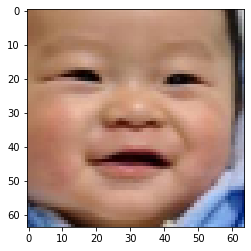

In [ ]:
print(age_label[40])
print(gender_label[40])
print(ethnicity_label[40])
plt.imshow(all_images[40])
plt.show()

In [ ]:
age_counts = pd.Series(age_label).value_counts()

## Create dataframe containing labels of each face image

In [ ]:
# Create a dataframe of images
arr = np.stack((files, age_label, gender_label, ethnicity_label), axis=1)
df_images = pd.DataFrame(arr, columns=['filename','age','gender','ethnicity'])
df_images['filename'] = df_images['filename'].astype(str)
df_images['age'] = df_images['age'].astype(int)
df_images['gender'] = df_images['gender'].astype(int)
df_images['ethnicity'] = df_images['ethnicity'].astype(int)
df_images.head()

,filename,age,gender,ethnicity
0,4_1_0_20170109193813519.jpg.chip.jpg,4,1,0
1,30_1_0_20170116211841219.jpg.chip.jpg,30,1,0
2,9_1_2_20161219192342173.jpg.chip.jpg,9,1,2
3,28_1_1_20170116164109844.jpg.chip.jpg,28,1,1
4,42_0_4_20170104202505130.jpg.chip.jpg,42,0,4


## Check for Null values

In [ ]:
# Check for Null values
df_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23708 entries, 0 to 23707
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   filename   23708 non-null  object
 1   age        23708 non-null  int64 
 2   gender     23708 non-null  int64 
 3   ethnicity  23708 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 741.0+ KB


No null values present.

## Map the gender and ethnicity which is denoted by an integer 
[View label information here](https://susanqq.github.io/UTKFace/) 

In [ ]:
# Map the gender and ethnicity to the dataframe
df_images['gender'] = df_images['gender'].map({0: 'male', 1: 'female'})
df_images['ethnicity'] = df_images['ethnicity'].map({0: 'White', 1: 'Black', 2: 'Asian', 3: 'Indian', 4: 'Others'})
df_images.head()

,filename,age,gender,ethnicity
0,4_1_0_20170109193813519.jpg.chip.jpg,4,female,White
1,30_1_0_20170116211841219.jpg.chip.jpg,30,female,White
2,9_1_2_20161219192342173.jpg.chip.jpg,9,female,Asian
3,28_1_1_20170116164109844.jpg.chip.jpg,28,female,Black
4,42_0_4_20170104202505130.jpg.chip.jpg,42,male,Others


# Exploratory Data Analysis

Analysing the dataset will help breakdown the project and identify what my workflow should look like, and to ultimately have the best data and model to optimize.

# Age Distribution

As we are looking to classify our dataset into age-ranges, observing the data set will help us identify how we can group them up into classes that make sense. The first step will be to plot out the distribution to see the count

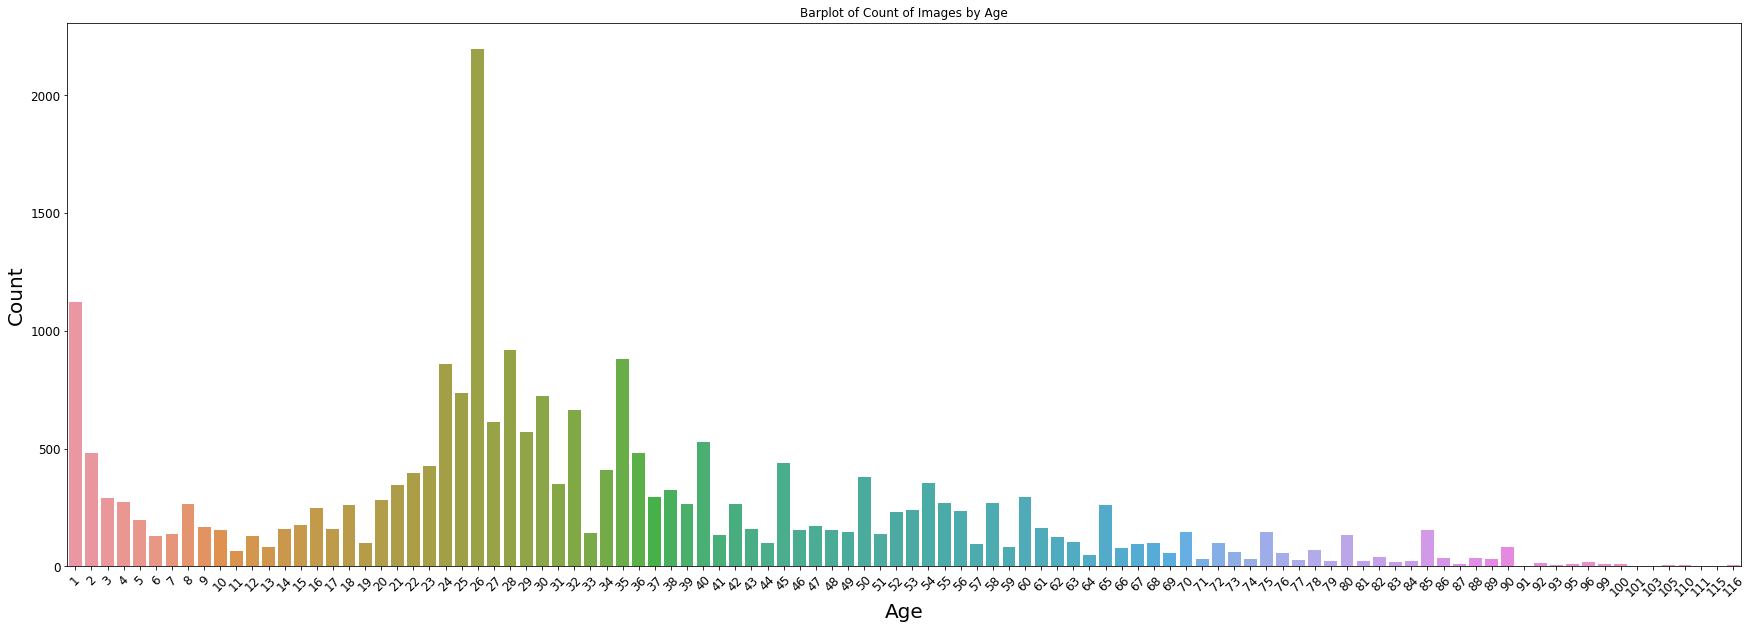

In [ ]:
# Plot the age counts

plt.figure(figsize=(30, 10))

ax = sns.barplot(x=df_images['age'].value_counts().sort_index().index, 
                 y=df_images['age'].value_counts().sort_index().values
                 )

ax.tick_params(axis='both', labelsize=12)
ax.tick_params(axis='x', labelrotation=45)

plt.xlabel('Age', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Barplot of Count of Images by Age');

plt.savefig('/content/drive/My Drive/Colab Notebooks/images/Barplot of Count of Images by Age.png')

We can observe that the data set is not equally distributed and not all ages are represented. 


## Classifying Dataset

We are interested to split the dataset into classes, with the aim of having a high accuracy, regardless of number of classes. Hence, for comparison, I have decided to create 3 different datasets, each with different numbers classes and considerations. 

## Classify Age in bin size of 10

My first approach was to classify the ages into bins of size 10. This was done to have an equal age-range between classes.

In [ ]:
# Declare bin sizes
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, np.inf]
names = ['<10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80+']

# Create Dataframe of bin sizes
age_binned = pd.cut(df_images['age'], bins, labels=names)
age_binned.value_counts().sort_index().index

CategoricalIndex(['<10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70',
                  '70-80', '80+'],
                 categories=['<10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', ...], ordered=True, dtype='category')

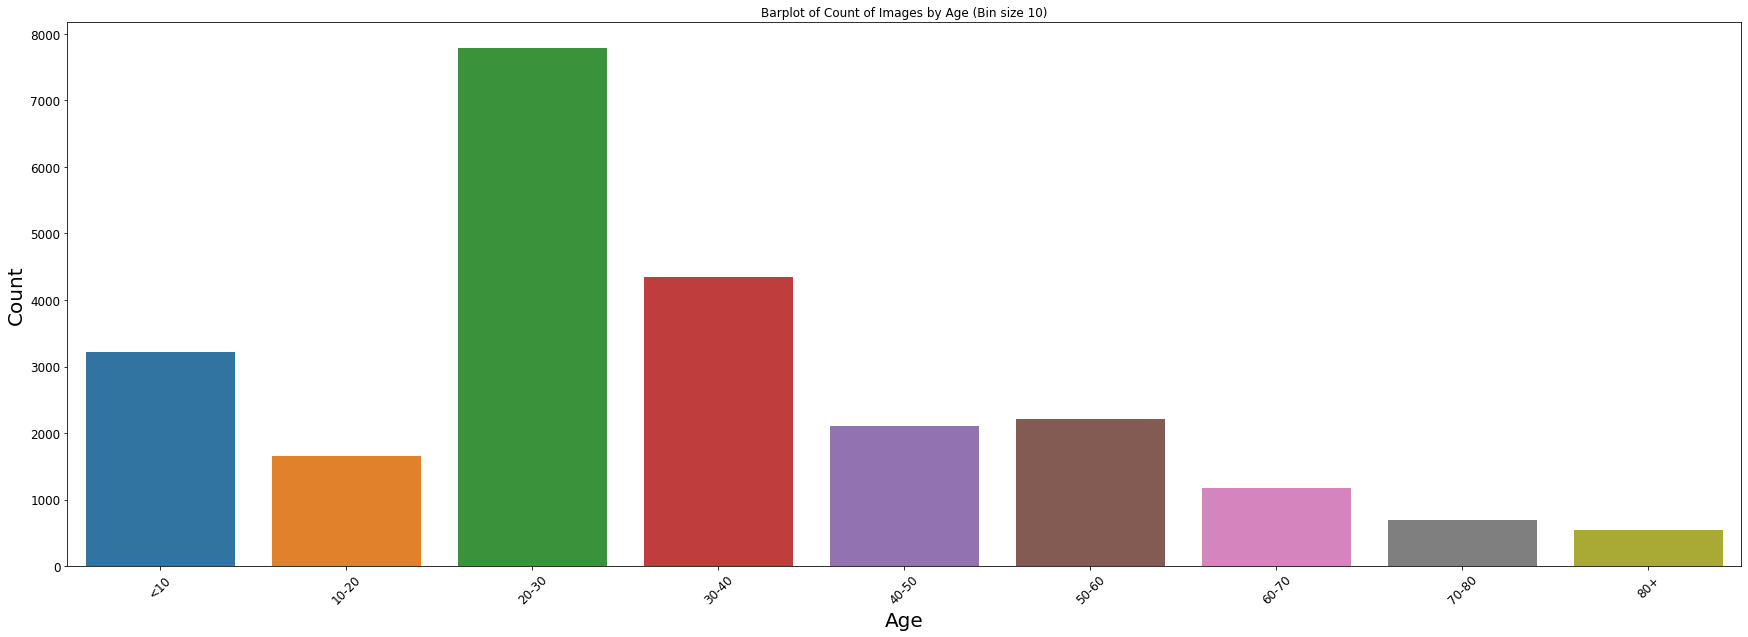

In [ ]:
# Plot the age counts by bins of 10

plt.figure(figsize=(30, 10))

ax = sns.barplot(x=age_binned.value_counts().sort_index().index, 
                 y=age_binned.value_counts().sort_index().values
                 )

ax.tick_params(axis='both', labelsize=12)
ax.tick_params(axis='x', labelrotation=45)

plt.xlabel('Age', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Barplot of Count of Images by Age (Bin size 10)');

plt.savefig('/content/drive/My Drive/Colab Notebooks/images/Barplot of Count of Images by Age (Bins size 10).png')

From here, we can observe that the dataset mostly composed of individuals that vary between 20-30 years old, followed by those from 30-40 years old, then 0-10 years old. From here, we believe that we will have good accuracy to predict individuals in this ranges if we were to train the model based on this bin size. However, the rest of the classes might not have enough data to train properly and have less than ideal accuracy. This would be an issue for an imbalanced dataset. 

In [ ]:
# Classify bins of 10 DataSet into dataframe

def age_class_bin10_label(age):
  if  age <= 9:
      return ('0-9')
  elif 10 <= age <= 19:
      return ('10-19')
  elif 20 <= age <= 29:
      return ('20-29')
  elif 30 <= age <= 39:
      return ('30-39')
  elif 40 <= age <= 49:
      return ('40-49')
  elif 50 <= age <= 59:
      return ('50-59')
  elif 60 <= age <= 69:
      return ('60-69')
  elif 70 <= age <= 79:
      return ('70-79')    
  elif 80 <= age <= 89:
      return ('80-89')   
  else:
      return ('90-116')

def age_class_bin10(age):
  if  age <= 9:
      return (0)
  elif 10 <= age <= 19:
      return (1)
  elif 20 <= age <= 29:
      return (2)
  elif 30 <= age <= 39:
      return (3)
  elif 40 <= age <= 49:
      return (4)
  elif 50 <= age <= 59:
      return (5)
  elif 60 <= age <= 69:
      return (6)
  elif 70 <= age <= 79:
      return (7)    
  elif 80 <= age <= 89:
      return (8)   
  else:
      return (9)

In [ ]:
# Add to dataframe bin10 label and class

df_images['age_bin10_label'] = df_images['age'].map(age_class_bin10_label)
df_images['age_bin10_class'] = df_images['age'].map(age_class_bin10)
df_images.head()

,filename,age,gender,ethnicity,age_bin10_label,age_bin10_class
0,4_1_0_20170109193813519.jpg.chip.jpg,4,female,White,0-9,0
1,30_1_0_20170116211841219.jpg.chip.jpg,30,female,White,30-39,3
2,9_1_2_20161219192342173.jpg.chip.jpg,9,female,Asian,0-9,0
3,28_1_1_20170116164109844.jpg.chip.jpg,28,female,Black,20-29,2
4,42_0_4_20170104202505130.jpg.chip.jpg,42,male,Others,40-49,4


## Classify Age by balancing dataset

A balanced dataset should allow the model to learn each range equally.




In [ ]:
# Ideal size for each balanced class
img_count = df_images['age'].count()
classes = 6
print(f'Number of Images: {img_count}')
print(f'Number of Classes: {classes}')
print(f'The ideal number of images in each class is: {round(img_count/classes,0)}')

Number of Images: 23708
Number of Classes: 6
The ideal number of images in each class is: 3951.0


Ideally, each class should contain 3951 images. We will manually allocate the classes to achieve this.

In [ ]:
def age_class_bal_label(age):
  if age <= 12:
        return '0-12'
  elif 13 <= age <= 25:
      return '13-25'
  elif 26 <= age <= 28:
      return '26-28'
  elif 29 <= age <= 38:
      return '29-38'
  elif 39 <= age <= 60:
      return '39-60'
  else:
      return '60-116'

def age_class_bal(age):
  if 1 <= age <= 12:
        return 0
  elif 13 <= age <= 25:
      return 1
  elif 26 <= age <= 28:
      return 2
  elif 29 <= age <= 38:
      return 3
  elif 39 <= age <= 60:
      return 4
  else:
      return 5

In [ ]:
# Add to dataframe bal label and class

df_images['age_bal_label'] = df_images['age'].map(age_class_bal_label)
df_images['age_bal_class'] = df_images['age'].map(age_class_bal)
df_images.head()

,filename,age,gender,ethnicity,age_bin10_label,age_bin10_class,age_bal_label,age_bal_class
0,4_1_0_20170109193813519.jpg.chip.jpg,4,female,White,0-9,0,0-12,0
1,30_1_0_20170116211841219.jpg.chip.jpg,30,female,White,30-39,3,29-38,3
2,9_1_2_20161219192342173.jpg.chip.jpg,9,female,Asian,0-9,0,0-12,0
3,28_1_1_20170116164109844.jpg.chip.jpg,28,female,Black,20-29,2,26-28,2
4,42_0_4_20170104202505130.jpg.chip.jpg,42,male,Others,40-49,4,39-60,4


In [ ]:
# Store balanced class counts in temporary dataframe

df_temp=pd.DataFrame(df_images['age_bal_label'].value_counts().sort_index().reset_index())
df_temp 

,index,age_bal_label
0,0-12,3413
1,13-25,4224
2,26-28,3730
3,29-38,4841
4,39-60,5103
5,60-116,2397


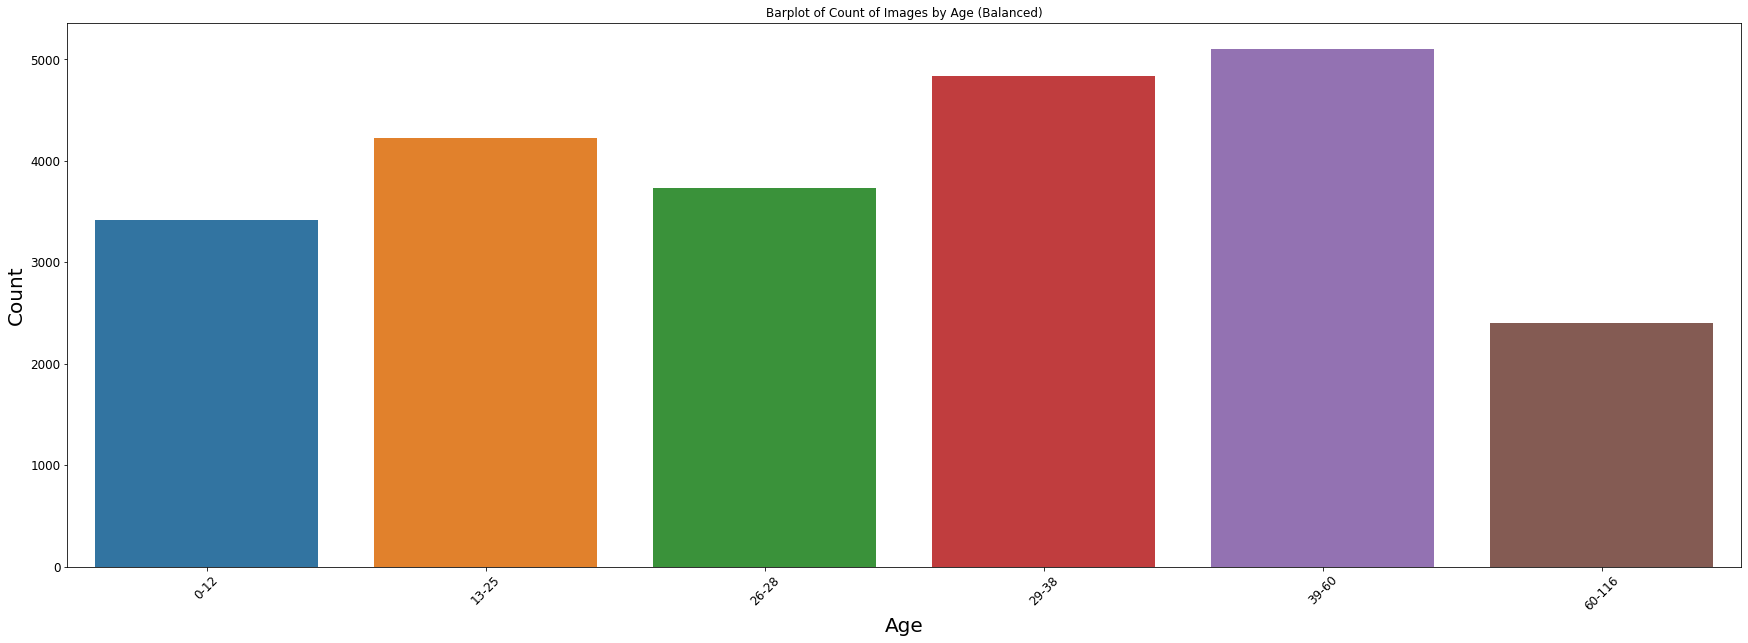

In [ ]:
# Plot the age counts by balancing dataset

plt.figure(figsize=(30, 10))

ax = sns.barplot(x=df_temp['index'],
                 y=df_temp['age_bal_label'])

ax.tick_params(axis='both', labelsize=12)
ax.tick_params(axis='x', labelrotation=45)

plt.xlabel('Age', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Barplot of Count of Images by Age (Balanced)');

plt.savefig('/content/drive/My Drive/Colab Notebooks/images/Barplot of Count of Images by Age (Balanced).png')

As mentioned above, we will attempt to get as close to 3951 images for each class. The caveat here is that the age-range for each class differs alot. 
as you can see, 26-28 is a very narrow age range, as it is the range with the most images, while 60-116 is a broad age range, yet it has the least images.

## Classify Age by human intuition

Instead of looking at the bin size and balancing the classes, I decided to take into account our intuition, on how we humans would classify a person through their stage of life.

Taking reference from this [article](https://integrisok.com/resources/on-your-health/2015/october/stages-of-life-health-for-every-age), the stages of life are defined as such.

* Infant = 0-1 year   
* Toddler = 2-4 years	  
* Child = 5-12 years   	
* Teen = 13-19 years
* Adult = 20-39 years	
* Middle Age Adult = 40-59 years	
* Senior Adult = 60+ years



In [ ]:
def age_class_intuit_label(age):
  if age <= 1:
        return '0-1'
  elif 2 <= age <= 4:
      return '2-4'
  elif 5 <= age <= 12:
      return '5-12'
  elif 13 <= age <= 19:
      return '13-19'
  elif 20 <= age <= 39:
      return '20-39'
  elif 40 <= age <= 59:
      return '40-59'
  else:
      return '60-116'

def age_class_intuit(age):
  if age <= 1:
        return 0
  elif 2 <= age <= 4:
      return 1
  elif 5 <= age <= 12:
      return 2
  elif 13 <= age <= 19:
      return 3
  elif 20 <= age <= 39:
      return 4
  elif 40 <= age <= 59:
      return 5
  else:
      return 6

In [ ]:
# Add to dataframe intuition label and class

df_images['age_intuit_label'] = df_images['age'].map(age_class_intuit_label)
df_images['age_intuit_class'] = df_images['age'].map(age_class_intuit)
df_images.head()

,filename,age,gender,ethnicity,age_bin10_label,age_bin10_class,age_bal_label,age_bal_class,age_intuit_label,age_intuit_class
0,4_1_0_20170109193813519.jpg.chip.jpg,4,female,White,0-9,0,0-12,0,2-4,1
1,30_1_0_20170116211841219.jpg.chip.jpg,30,female,White,30-39,3,29-38,3,20-39,4
2,9_1_2_20161219192342173.jpg.chip.jpg,9,female,Asian,0-9,0,0-12,0,5-12,2
3,28_1_1_20170116164109844.jpg.chip.jpg,28,female,Black,20-29,2,26-28,2,20-39,4
4,42_0_4_20170104202505130.jpg.chip.jpg,42,male,Others,40-49,4,39-60,4,40-59,5


In [ ]:
# Store intuit class counts in temporary dataframe

df_temp=pd.DataFrame(df_images['age_intuit_label'].value_counts().sort_index().reset_index())
df_temp 

,index,age_intuit_label
0,0-1,1123
1,13-19,1180
2,2-4,1044
3,20-39,11881
4,40-59,4544
5,5-12,1246
6,60-116,2690


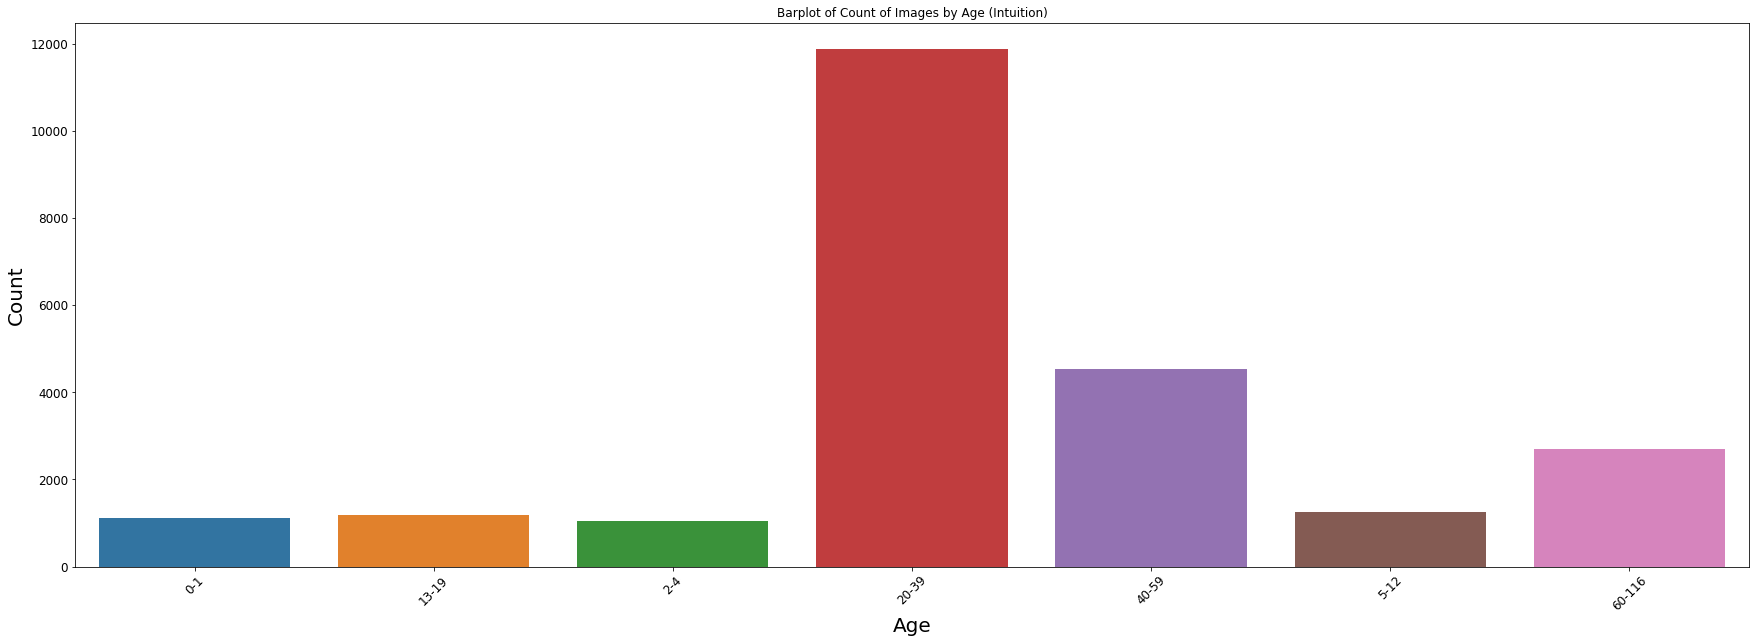

In [ ]:
# Plot the age counts by intuition

plt.figure(figsize=(30, 10))

ax = sns.barplot(x=df_temp['index'],
                 y=df_temp['age_intuit_label'])

ax.tick_params(axis='both', labelsize=12)
ax.tick_params(axis='x', labelrotation=45)

plt.xlabel('Age', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Barplot of Count of Images by Age (Intuition)');

plt.savefig('/content/drive/My Drive/Colab Notebooks/images/Barplot of Count of Images by Age (Intuition).png')

As can be seen, the dataset is not ideal as its unbalanced. But we'll see how well it performs with the rest of the models

# Gender Distribution

Gender classification will be a seperate model from age classification

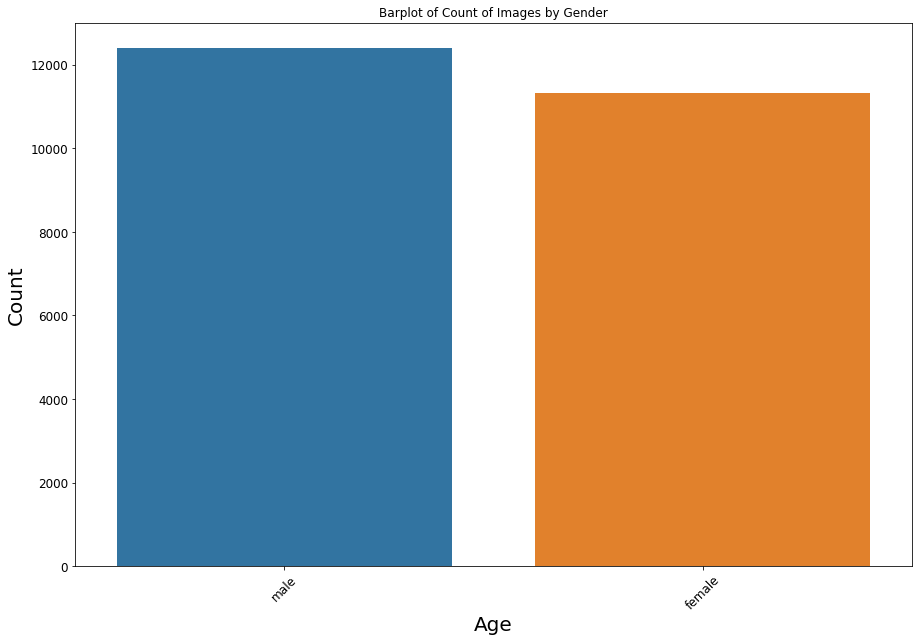

In [ ]:
# Plot the gender distribution

plt.figure(figsize=(15, 10))

ax = sns.barplot(x=df_images['gender'].value_counts().index,
                 y=df_images['gender'].value_counts().values)

ax.tick_params(axis='both', labelsize=12)
ax.tick_params(axis='x', labelrotation=45)

plt.xlabel('Gender', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Barplot of Count of Images by Gender');

plt.savefig('/content/drive/My Drive/Colab Notebooks/images/Barplot of Count of Images by Gender.png')

For both the female and male samples, we have a good balanced number of images, so we should have a great accuracy for both classes when using our models.

# Ethnicity Distribution

Although the model is not required to predict ethnicity, visualizing the data helps us to understand the dataset. It could possibly help us to identify if ethnicity (skin colour/features) is decreasing our accuracy, as people of different ethnicity age differently.

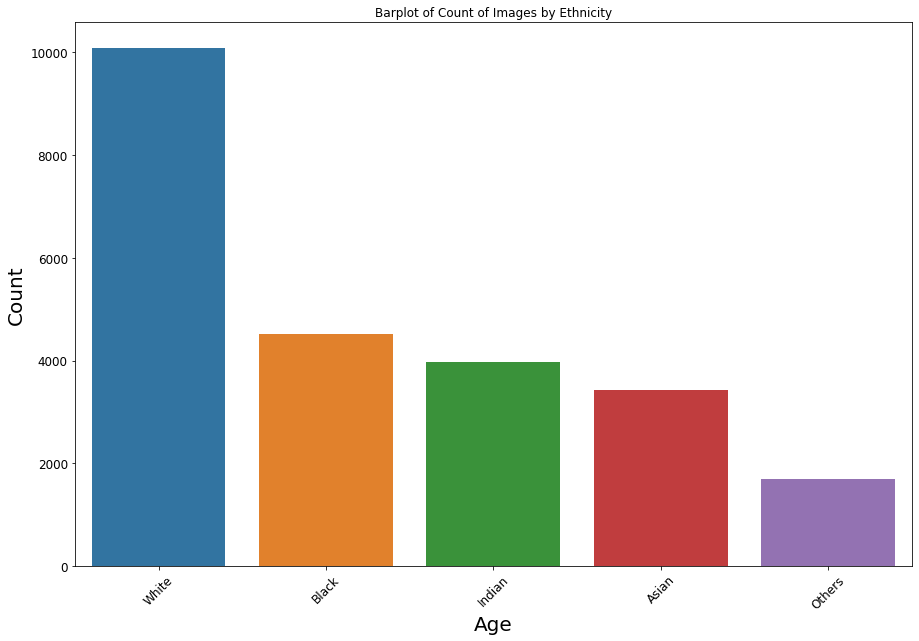

In [ ]:
# Plot the gender distribution

plt.figure(figsize=(15, 10))

ax = sns.barplot(x=df_images['ethnicity'].value_counts().index,
             y=df_images['ethnicity'].value_counts().values)

ax.tick_params(axis='both', labelsize=12)
ax.tick_params(axis='x', labelrotation=45)

plt.xlabel('Ethnicity', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Barplot of Count of Images by Ethnicity');

plt.savefig('/content/drive/My Drive/Colab Notebooks/images/Barplot of Count of Images by Ethnicity.png')

From the plot, we can see that almost half of the samples are white, while the other ethnicities are alot smaller, which could lead to a smaller accuracy for their images.

# Export dataframe

Dataframe will be exported as a CSV file and used for reference to read images and hold the different classification labels

In [ ]:
# Update filename in dataframe
files = ['/content/UTKFace/' + f for f in files]

df_images['filename'] = files

In [ ]:
# Exporting df_images as a CSV file.

df_images.to_csv("/content/drive/My Drive/Colab Notebooks/dataframe/image_classes_summary.csv", index=False)

In [ ]:
df_images.head()

,filename,age,gender,ethnicity,age_bin10_label,age_bin10_class,age_bal_label,age_bal_class,age_intuit_label,age_intuit_class
0,/content/UTKFace/4_1_0_20170109193813519.jpg.c...,4,female,White,0-9,0,0-12,0,2-4,1
1,/content/UTKFace/30_1_0_20170116211841219.jpg....,30,female,White,30-39,3,29-38,3,20-39,4
2,/content/UTKFace/9_1_2_20161219192342173.jpg.c...,9,female,Asian,0-9,0,0-12,0,5-12,2
3,/content/UTKFace/28_1_1_20170116164109844.jpg....,28,female,Black,20-29,2,26-28,2,20-39,4
4,/content/UTKFace/42_0_4_20170104202505130.jpg....,42,male,Others,40-49,4,39-60,4,40-59,5
